<a href="https://colab.research.google.com/github/Sudipta-Mitra/Feedforward-Neural-Network/blob/main/FEEDFORWARD_NEURAL_NETWORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
base_model=ResNet50(weights='imagenet',input_tensor=inputs)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
base_model.output_shape

(None, 1000)

In [ ]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 518, 518,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 256, 256,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 256, 256,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 256, 256,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 258, 258,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 128, 128,  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 128, 128,  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 128, 128,  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 128, 128,  │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 128, 128,  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 128, 128,  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 128, 128,  │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 128, 128,  │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 128, 128,  │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 128, 128,  │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 128, 128,  │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
base_model.save('resnet100.h5')

In [ ]:
import numpy as np
from tensorflow.keras.utils import load_img,img_to_array # Changed 'ultis' to 'utils'
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions

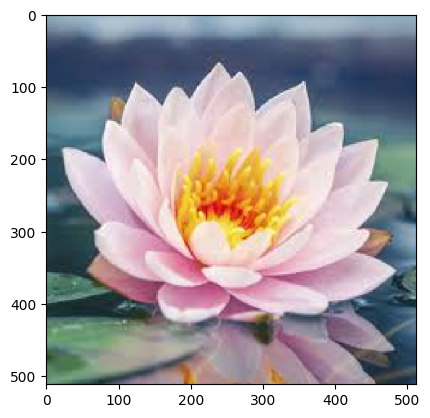

In [ ]:
img=load_img('/content/FLOWER.jpeg',target_size=input_shape)
plt.imshow(img)
img=img_to_array(img)
img=np.expand_dims(img,axis=0)

In [ ]:
img=preprocess_input(img)
img

array([[[[ 74.061   ,  47.221   ,  11.32    ],
         [ 74.061   ,  47.221   ,  11.32    ],
         [ 75.061   ,  48.221   ,  12.32    ],
         ...,
         [ 82.061   ,  53.221   ,  17.32    ],
         [ 83.061   ,  52.221   ,  16.32    ],
         [ 83.061   ,  52.221   ,  16.32    ]],

        [[ 74.061   ,  47.221   ,  11.32    ],
         [ 74.061   ,  47.221   ,  11.32    ],
         [ 75.061   ,  48.221   ,  12.32    ],
         ...,
         [ 82.061   ,  53.221   ,  17.32    ],
         [ 83.061   ,  52.221   ,  16.32    ],
         [ 83.061   ,  52.221   ,  16.32    ]],

        [[ 75.061   ,  48.221   ,  12.32    ],
         [ 75.061   ,  48.221   ,  12.32    ],
         [ 75.061   ,  48.221   ,  12.32    ],
         ...,
         [ 84.061   ,  55.221   ,  19.32    ],
         [ 85.061   ,  54.221   ,  18.32    ],
         [ 85.061   ,  54.221   ,  18.32    ]],

        ...,

        [[ 19.060997,  35.221   , -16.68    ],
         [ 19.060997,  35.221   , -16.68    ]

In [ ]:
predict=base_model.predict(img)
predict

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_50']
Received: inputs=Tensor(shape=(1, 512, 512, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


array([[2.37686691e-04, 3.59756057e-03, 5.81033783e-05, 2.18398214e-04,
        1.69450228e-04, 1.41313137e-03, 2.40544978e-05, 6.79276272e-05,
        1.22759928e-04, 7.36108723e-06, 7.31143053e-04, 1.81155527e-04,
        3.41816718e-04, 1.11144756e-04, 4.64763405e-04, 2.69034965e-04,
        1.00244151e-03, 1.13137481e-04, 5.93075638e-05, 1.72768021e-04,
        4.13997419e-04, 5.72842371e-04, 5.63355461e-05, 4.17502342e-05,
        2.34736472e-05, 3.22537744e-05, 8.51209043e-04, 5.04786847e-04,
        3.21902131e-04, 1.21593545e-03, 2.44005059e-04, 2.04804455e-04,
        4.05939820e-04, 1.12653528e-04, 1.83290322e-04, 2.79442378e-04,
        6.24666049e-04, 3.38016653e-05, 6.98746298e-04, 1.03701597e-04,
        2.27316501e-04, 8.00715177e-04, 5.31799451e-05, 9.83964186e-04,
        2.68621196e-04, 4.89219783e-05, 1.02031023e-04, 1.46642129e-03,
        4.43140016e-06, 5.69288522e-06, 1.02515432e-05, 4.46669495e-04,
        4.73719032e-04, 4.94529144e-04, 5.40932924e-05, 7.452700

In [ ]:
decode_predictions(predict,top=10)[0]
#

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[('n11939491', 'daisy', np.float32(0.15183215)),
 ('n03944341', 'pinwheel', np.float32(0.05709624)),
 ('n13044778', 'earthstar', np.float32(0.05637941)),
 ('n07930864', 'cup', np.float32(0.023548843)),
 ('n01944390', 'snail', np.float32(0.021309013)),
 ('n02219486', 'ant', np.float32(0.018859351)),
 ('n01795545', 'black_grouse', np.float32(0.014774695)),
 ('n02948072', 'candle', np.float32(0.013362343)),
 ('n04357314', 'sunscreen', np.float32(0.012606873)),
 ('n04423845', 'thimble', np.float32(0.012563216))]